In [22]:
import numpy as np
import matplotlib.pyplot as pt
import pandas as pd
import seaborn as sns

In [23]:
df = pd.read_csv("../Feynn Labs/crop_reco.csv")

In [24]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


## Checking the data for Null Values

In [25]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [26]:
x = df.drop('label',axis=1)
y = df['label']

## Spliting the Data

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

## Scaling the Data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

## Fitting The Model

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [35]:
pred = model.predict(x_test)

In [32]:
from sklearn.metrics import classification_report,plot_confusion_matrix,accuracy_score

C:\Users\rishi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


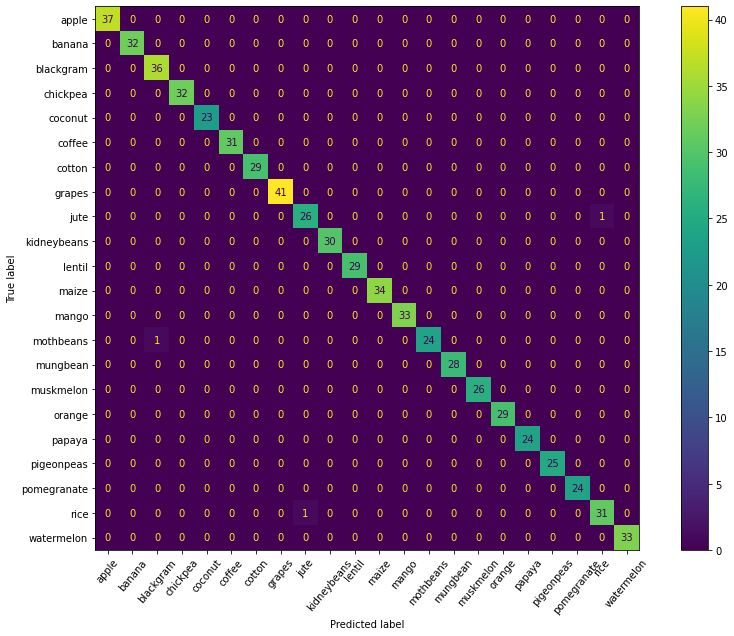

In [33]:
fig, ax = pt.subplots(figsize=(15,10))
plot_confusion_matrix(model,x_test,y_test,ax=ax,xticks_rotation=50)
pt.savefig('Dt.png')

## Accuracy Score

In [38]:
accuracy_score(y_test,pred)

0.9954545454545455